In [4]:
import tensorflow as tf
from tensorflow import keras

Read DICOM files and plotting with matplotlib

Automatically created module for IPython interactive environment

Filename.........: data/ProstateX_Lesion_Seg/Prostatex0000/study/ep2d_diff_tra_DYNDIST_ADC/IM-0003-0001.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: ProstateX-0000, 
Patient id.......: ProstateX-0000
Modality.........: MR
Study Date.......: 20110707
Image size.......: 128 x 84, 21504 bytes
Pixel spacing....: [2, 2]
Slice location...: 2.1236032461738


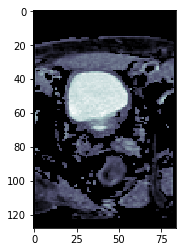

In [3]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files

print(__doc__)

# filename = get_testdata_files('CT_small.dcm')[0]
filename = 'data/ProstateX_Lesion_Seg/Prostatex0000/study/ep2d_diff_tra_DYNDIST_ADC/IM-0003-0001.dcm'
dataset = pydicom.dcmread(filename)

# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)

# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()